# Project Introduction

### Problem:
Concrete's strength is a critical factor in determining its performance. Current tests that are used as industry standards are expensive, destructive and time consuming. There is an urgent need for a technique to predict strength non-destructively which could be cheaper and faster.

### Hypothesis:
Based on limited data of concrete parameters obtained from on-site it is possible to train ML models like Linear Regression, Regressive Neural networks to predict strength. It is believed in this project that efficient ML models can be trained which would provide an alternative technique for compressive strength prediction.

### Dataset

Dataset Source: The dataset is from https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength


Acknowledgements
Original Owner and Donor

Prof. I-Cheng Yeh

Department of Information Management

Chung-Hua University

Citation Request:

I-Cheng Yeh, "Modeling of strength of high performance concrete using artificial neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
df = pd.read_csv("./concrete_data.csv")

The Dataset has 1030 entries and 9 columns.

In [120]:
print(df.shape)

print(df.dtypes)

(1030, 9)
Cement                float64
Blast Furnace Slag    float64
Fly Ash               float64
Water                 float64
Superplasticizer      float64
Coarse Aggregate      float64
Fine Aggregate        float64
Age                     int64
Strength              float64
dtype: object


In [3]:
df.head(10)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


## Dataset description:

The features includes:

1.   Cement
2.   Blast Furnace Slag
3.   Fly Ash
4.   Water
5.   Super-plasticizer
6.   Coarse Aggregate
7.   Fine Aggregate
8.   Age
  


The target is:

Strength

Check for null values in the dataset

In [121]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

## Exploratory Data Analysis

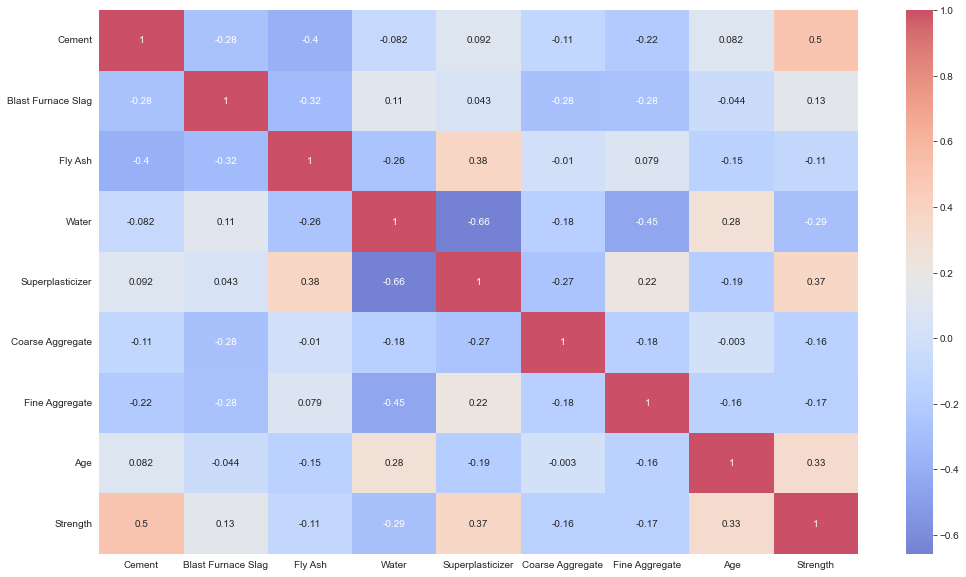

In [165]:
plt.figure(figsize=[17,10])
sns.set_style('whitegrid')
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', alpha=0.7)
plt.savefig('heatmap.png', dpi=300)
plt.show()

* There isn't any high correlations between Strength and other features except for Cement.
* So we will apply linear regression model to predict strength.


## Data Preprocessing

Separating Input Features and Target Variables

In [123]:
X = df.iloc[:,:-1]         # Features - All columns but last
y = df.iloc[:,-1]          # Target - Last Column

Splitting data into Training and Test splits.

In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

Standardizing the data i.e. to rescale the features to have a mean of zero and standard deviation of 1.

In [125]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Linear Regression

In [139]:
# import linear regression models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr=LinearRegression()

# fit model on training data
fit=lr.fit(X_train,y_train)


y_predict = lr.predict(X_test)

print("R-squared score = ", r2_score(y_test, y_predict))
print('mean_sqrd_error is =', mean_squared_error(y_test,y_predict))

rms = np.sqrt(mean_squared_error(y_test,y_predict)) 
print('root mean squared error is = {}'.format(rms))

R-squared score =  0.5701142652757778
mean_sqrd_error is = 105.76432225737786
root mean squared error is = 10.284178249008418


#### Plotting the predictions

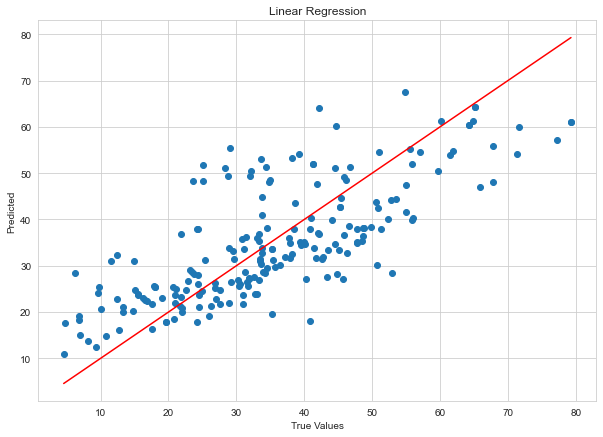

In [161]:
plt.figure(figsize=[10,7])
plt.scatter(y_test,y_predict)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('True Values')
plt.ylabel('Predicted')
plt.title("Linear Regression")
plt.savefig('lrplot.png', dpi=300)
plt.show()

# Random Forest Regressor

In [140]:
# import random forest regression
from sklearn.ensemble import RandomForestRegressor

rnd= RandomForestRegressor(n_estimators=100)

# fit the model on training data
fit_rnd= rnd.fit(X_train, y_train)

print("R-squared score = ", r2_score(y_test, rnd.predict(X_test)))
print('mean_sqrd_error is = ',mean_squared_error(y_test, rnd.predict(X_test)))
print('root_mean_squared error of is = ',np.sqrt(mean_squared_error(y_test, rnd.predict(X_test))))

R-squared score =  0.8929711658347169
mean_sqrd_error is =  26.33218828428973
root_mean_squared error of is =  5.13148986984187


#### Plotting the predictions

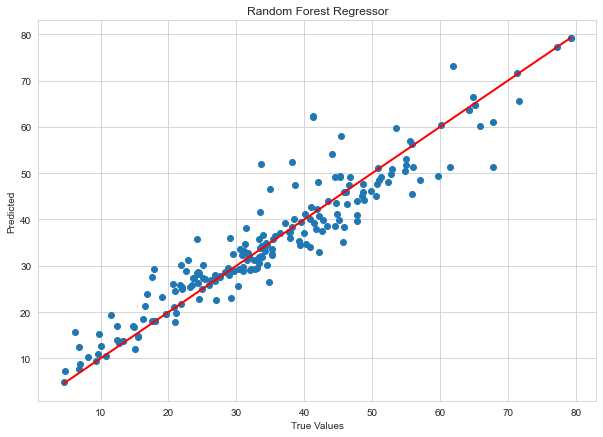

In [162]:
y_pred_rfr = rnd.predict(X_test)

plt.figure(figsize=[10, 7])
plt.scatter(y_test, y_pred_rfr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=2, color='red')
plt.xlabel("True Values")
plt.ylabel("Predicted")
plt.title("Random Forest Regressor")
plt.savefig('rndplot.png', dpi=300)
plt.show()

# Neural Network Regressor

In [71]:
# import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [131]:
# define regression model
def regression_model():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(8,)))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='linear'))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model

nn = regression_model()
print(nn.summary())

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_73 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_19 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_20 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_75 (Dense)             (None, 1)                 257       
Total params: 100,225
Trainable params: 100,225
Non-trainable params: 0
_______________________________________________

In [134]:
# Train the network
nn.fit(X_train, y_train, epochs=1000, verbose=0)

In [158]:
#predict output on test set
y_nn_pred = nn.predict(X_test)

print('mean_squared_error is = ', mean_squared_error(y_test, y_nn_pred))
print('root_mean_squared error of is = ',np.sqrt(mean_squared_error(y_test, y_nn_pred)))

mean_squared_error is =  18.927079577326438
root_mean_squared error of is =  4.350526356353497


#### Plotting the predictions

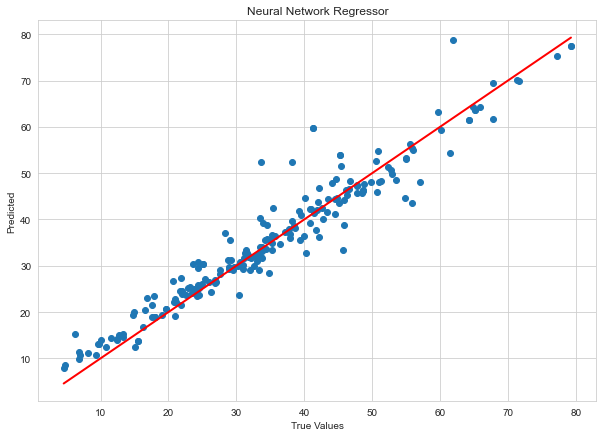

In [163]:
plt.figure(figsize=[10, 7])
plt.scatter(y_test, y_nn_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=2, color='red')
plt.xlabel("True Values")
plt.ylabel("Predicted")
plt.title("Neural Network Regressor")
plt.savefig('nnplot.png', dpi=300)
plt.show()

# Conclusion

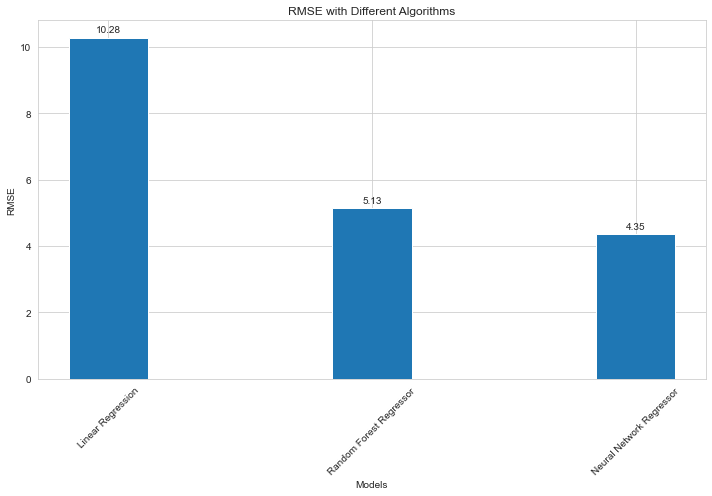

In [164]:
models = [lr, rnd, nn]
names = ["Linear Regression", "Random Forest Regressor", "Neural Network Regressor"]
rmses = []

for model in models:
    rmses.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

x = np.arange(len(names)) 
width = 0.3

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

fig, ax = plt.subplots(figsize=(10,7))
rects = ax.bar(x, rmses, width)
ax.set_ylabel('RMSE')
ax.set_xlabel('Models')
ax.set_title('RMSE with Different Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=45)
autolabel(rects)
fig.tight_layout()
plt.savefig('comparision.png', dpi=300)
plt.show()

#### Neural Network proves to be the best model for our use case. It was possible due to it's ability to learn from complex patterns.